In [32]:
import pandas as pd
import numpy as np

import tweepy
import re

from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [63]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip freeze > requirements2.txt

Note: you may need to restart the kernel to use updated packages.


In [33]:
ApiKey='ZIzq9YljAtAbK8286pU59JhfA'
ApiKeySecret='hvwtuuEb8kJ9DGnx8ar86FyAS4G1SrJmHH1GMptWHpSFFGqare'
AccessToken='2588927641-L4WOSIg90LhBcmo4i4cVH7STU4zblaSSMWUk9pq'
AccessTokenSecret='rMK2IbDqov386ERvcsbQvJMPDKjek7IrmLfcyIS0x1yxm'

In [34]:
keyword="Bahubhali"

In [35]:
# Create an Authentication object
authenticate=tweepy.OAuthHandler(ApiKey,ApiKeySecret)

In [36]:
# Set the access token & acccess token secret
authenticate.set_access_token(AccessToken,AccessTokenSecret)

In [37]:
# Create the API object while passing in the auth information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [38]:
# 1) Extract tweets via from Keyword 
# Reference : https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
Tweets = tweepy.Cursor(api.search_tweets,
                       q=keyword,
                       result_type = "recent",
                       lang = "en").items(20)

In [39]:
Tweets_List=[tweet.text for tweet in Tweets]
Tweets_List

['@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 From the director of bahubhali anna north lo RRR ki hype ledhu bro unt… https://t.co/XSvCqntHj5',
 '@Rebeelstaar @TPHOffl Bahubhali got hit only because of SSR and Rana',
 '@cricketHemant11 @onasinningspree Tollywood only bahubhali series collections&gt;&gt;&gt;&gt;&gt;srk all movie collections Yash is… https://t.co/AdSTmDTjCq',
 '@CinemaXCricket If part 2 is as good as part 1 then the records of bahubhali 2 are gone that is 100% true .\nIf rele… https://t.co/cZY38rsudh',
 '@Prabhas280 Yes...bahubhali craze ni padu chesaru...atleast from now prabhas should br cautious in encouraging new talent',
 '@Tutejajoginder Kgf is all about elevations without gripping story and logics… people will come to know this in few… https://t.co/Axen8QHJLC',
 '@Ali876salman @taran_adarsh @hombalefilms Thoda apna deemak to lagao. RRR comes after bahubhali 1 and 2 . And alrea… https://t.co/w56qQsCEGQ',
 '@drogoatwano @tollymasti Shift these guys are thinking lik

In [40]:
print(type(Tweets))
print(type(Tweets_List))

<class 'tweepy.cursor.ItemIterator'>
<class 'list'>


In [41]:
# 2) Extract tweets via from twitter account 
# Extract 100 tweets from the twitter user


# posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

# i=1
# for tweet in posts[0:5]:
#     print(str(i) + ') '+ tweet.full_text+ '\n')
#     i=i+1

In [42]:
#print(type(posts))

# creating a dataframe with a column called Tweets
# df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# df.head()

In [43]:
# creating a dataframe with a column called Tweets
df=pd.DataFrame(Tweets_List, columns=['Tweets'])
df['Cleaning_Tweets']=df['Tweets']
df.head()

,Tweets,Cleaning_Tweets
0,@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 F...,@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 F...
1,@Rebeelstaar @TPHOffl Bahubhali got hit only b...,@Rebeelstaar @TPHOffl Bahubhali got hit only b...
2,@cricketHemant11 @onasinningspree Tollywood on...,@cricketHemant11 @onasinningspree Tollywood on...
3,@CinemaXCricket If part 2 is as good as part 1...,@CinemaXCricket If part 2 is as good as part 1...
4,@Prabhas280 Yes...bahubhali craze ni padu ches...,@Prabhas280 Yes...bahubhali craze ni padu ches...


In [44]:
# Cleaning the tweet
def cleanText(text):
    # Removing @mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    
    # Removing the # symbol
    text=re.sub(r'#','',text)
    
    # Removing RT & immediate space after it, RT symbolises Retweet
    text=re.sub(r'RT[\s]+','',text)
    
    # Removing the hyperlink
    text=re.sub(r'https?:\/\/','',text)
    
    return text


# Appyling clean function on text observed
df['Cleaning_Tweets']=df['Cleaning_Tweets'].apply(cleanText)


# Display cleaned text
df  

,Tweets,Cleaning_Tweets
0,@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 F...,_NarukuLLa8 From the director of bahubhali a...
1,@Rebeelstaar @TPHOffl Bahubhali got hit only b...,Bahubhali got hit only because of SSR and Rana
2,@cricketHemant11 @onasinningspree Tollywood on...,Tollywood only bahubhali series collections&...
3,@CinemaXCricket If part 2 is as good as part 1...,If part 2 is as good as part 1 then the recor...
4,@Prabhas280 Yes...bahubhali craze ni padu ches...,Yes...bahubhali craze ni padu chesaru...atlea...
5,@Tutejajoginder Kgf is all about elevations wi...,Kgf is all about elevations without gripping ...
6,@Ali876salman @taran_adarsh @hombalefilms Thod...,_adarsh Thoda apna deemak to lagao. RRR come...
7,@drogoatwano @tollymasti Shift these guys are ...,Shift these guys are thinking like content m...
8,"Bahubhali followed by KGF , Bahubhali 2 , RRR ...","Bahubhali followed by KGF , Bahubhali 2 , RRR ..."
9,@box_oficeIndian Aftet bahubhali 2 major flops...,_oficeIndian Aftet bahubhali 2 major flops. I ...


In [45]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# Creating 2 columns : Subjectivity & Polarity
df['Subjectivity']=df['Cleaning_Tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaning_Tweets'].apply(getPolarity)

# Displaying updated dataframe
df

,Tweets,Cleaning_Tweets,Subjectivity,Polarity
0,@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 F...,_NarukuLLa8 From the director of bahubhali a...,0.000000,0.000000
1,@Rebeelstaar @TPHOffl Bahubhali got hit only b...,Bahubhali got hit only because of SSR and Rana,1.000000,0.000000
2,@cricketHemant11 @onasinningspree Tollywood on...,Tollywood only bahubhali series collections&...,1.000000,0.000000
3,@CinemaXCricket If part 2 is as good as part 1...,If part 2 is as good as part 1 then the recor...,0.625000,0.525000
4,@Prabhas280 Yes...bahubhali craze ni padu ches...,Yes...bahubhali craze ni padu chesaru...atlea...,0.454545,0.136364
5,@Tutejajoginder Kgf is all about elevations wi...,Kgf is all about elevations without gripping ...,1.000000,0.500000
6,@Ali876salman @taran_adarsh @hombalefilms Thod...,_adarsh Thoda apna deemak to lagao. RRR come...,0.000000,0.000000
7,@drogoatwano @tollymasti Shift these guys are ...,Shift these guys are thinking like content m...,0.100000,0.000000
8,"Bahubhali followed by KGF , Bahubhali 2 , RRR ...","Bahubhali followed by KGF , Bahubhali 2 , RRR ...",0.000000,0.000000
9,@box_oficeIndian Aftet bahubhali 2 major flops...,_oficeIndian Aftet bahubhali 2 major flops. I ...,0.550000,0.381250


<function matplotlib.pyplot.show(close=None, block=None)>

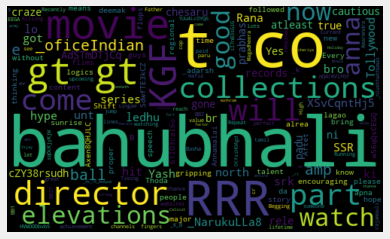

In [46]:
# Plotting the Word Cloud
allWords=' '.join( [tweet for tweet in df['Cleaning_Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [47]:
# Creating function to find tweet reflects Negative/Neutral/Positive Sentiment
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else :
        return 'Positive'

# Apply Analysis on 'Polarity' column values
df['Analysis']=df['Polarity'].apply(getAnalysis)

# Display Sentiments
df

,Tweets,Cleaning_Tweets,Subjectivity,Polarity,Analysis
0,@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 F...,_NarukuLLa8 From the director of bahubhali a...,0.000000,0.000000,Neutral
1,@Rebeelstaar @TPHOffl Bahubhali got hit only b...,Bahubhali got hit only because of SSR and Rana,1.000000,0.000000,Neutral
2,@cricketHemant11 @onasinningspree Tollywood on...,Tollywood only bahubhali series collections&...,1.000000,0.000000,Neutral
3,@CinemaXCricket If part 2 is as good as part 1...,If part 2 is as good as part 1 then the recor...,0.625000,0.525000,Positive
4,@Prabhas280 Yes...bahubhali craze ni padu ches...,Yes...bahubhali craze ni padu chesaru...atlea...,0.454545,0.136364,Positive
5,@Tutejajoginder Kgf is all about elevations wi...,Kgf is all about elevations without gripping ...,1.000000,0.500000,Positive
6,@Ali876salman @taran_adarsh @hombalefilms Thod...,_adarsh Thoda apna deemak to lagao. RRR come...,0.000000,0.000000,Neutral
7,@drogoatwano @tollymasti Shift these guys are ...,Shift these guys are thinking like content m...,0.100000,0.000000,Neutral
8,"Bahubhali followed by KGF , Bahubhali 2 , RRR ...","Bahubhali followed by KGF , Bahubhali 2 , RRR ...",0.000000,0.000000,Neutral
9,@box_oficeIndian Aftet bahubhali 2 major flops...,_oficeIndian Aftet bahubhali 2 major flops. I ...,0.550000,0.381250,Positive


In [48]:
sortedDF=df.sort_values(by=['Polarity'])

In [49]:
# Print all Positive Tweets
j=1
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) 0.52-->@CinemaXCricket If part 2 is as good as part 1 then the records of bahubhali 2 are gone that is 100% true .
If rele… https://t.co/cZY38rsudh

2) 0.14-->@Prabhas280 Yes...bahubhali craze ni padu chesaru...atleast from now prabhas should br cautious in encouraging new talent

3) 0.5-->@Tutejajoginder Kgf is all about elevations without gripping story and logics… people will come to know this in few… https://t.co/Axen8QHJLC

4) 0.38-->@box_oficeIndian Aftet bahubhali 2 major flops. I hope he comes with good movie

5) 1.0-->@bhogleharsha Timing of the jump to reach the ball was as perfect as 10 on 10. The ball remained in his 3 fingers e… https://t.co/1Uu4Lc0YQ6

6) 0.39-->BEST  = Magadheera, Amarendra Bahubhali part of BB1 and BB2 , EEGA

Current High Repeat value= RRR but not so great… https://t.co/iI7nB3sGlG

7) 0.22-->RT @MeticulousViews: @Forumkeralam2 Calicut mathram allalo entire Kerala Vijay de strong fort thanne. Holiday ennath cheriya factor alla. e…



In [50]:
# Print all Negative Tweets
j=1
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) -0.2-->@i_nivethathomas Lots of them... Recently few lines r for someone... But Basha paru. KGF,bahubhali, singam tamil ev… https://t.co/sqOcKjyKjW



In [51]:
# Print all Neutral Tweets
j=1
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Neutral'):
        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) 0.0-->@Prudhvi143Teja @naveenpari2 @Sai_NarukuLLa8 From the director of bahubhali anna north lo RRR ki hype ledhu bro unt… https://t.co/XSvCqntHj5

2) 0.0-->@Rebeelstaar @TPHOffl Bahubhali got hit only because of SSR and Rana

3) 0.0-->@cricketHemant11 @onasinningspree Tollywood only bahubhali series collections&gt;&gt;&gt;&gt;&gt;srk all movie collections Yash is… https://t.co/AdSTmDTjCq

4) 0.0-->@Ali876salman @taran_adarsh @hombalefilms Thoda apna deemak to lagao. RRR comes after bahubhali 1 and 2 . And alrea… https://t.co/w56qQsCEGQ

5) 0.0-->@drogoatwano @tollymasti Shift these guys are thinking like content means elevations .please watch a proper movie B… https://t.co/61IO3cal6o

6) 0.0-->Bahubhali followed by KGF , Bahubhali 2 , RRR and Now KGF 2 is the sunrise for the regional flims but will bring da… https://t.co/SdwfTE3kCZ

7) 0.0-->@sreeramjvc @annamalai_k Every time I watch Annamalai Anna speech it is like watching bahubhali movie or RRR or cop… https://t.co/HVWO0Dbvb5



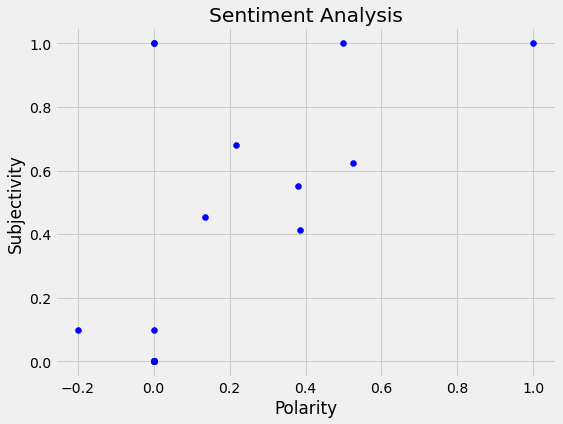

In [52]:
# Plot the Polarity & Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [53]:
# Get % of +ve tweets
ptweets=df[df.Analysis=='Positive']

round(ptweets.shape[0]/df.shape[0]*100,1)


35.0

In [54]:
# Get % of -ve tweets
ntweets=df[df.Analysis=='Negative']

round(ntweets.shape[0]/df.shape[0]*100,1)

5.0

In [55]:
# Get % of Neutral tweets
neutralTweets=df[df.Analysis=='Neutral']

round(neutralTweets.shape[0]/df.shape[0]*100,1)

60.0

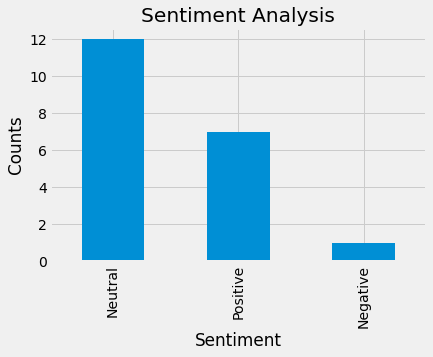

In [56]:
# Show the value counts
df['Analysis'].value_counts()

#Plot & visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [57]:
# Link : https://github.com/jfdavidson/pandas-to-datatables


# table = df.to_json(orient='split', index=False)
# table
# 'ajax':{url: 'link/to/above', dataSrc: 'data'}

In [58]:
import webbrowser

In [59]:
#https://www.thepythoncode.com/article/convert-pandas-dataframe-to-html-table-python

In [60]:
def generate_html(dataframe: pd.DataFrame):
    # get the table HTML from the dataframe
    table_html = dataframe.to_html(table_id="table")
    # construct the complete HTML with jQuery Data tables
    # You can disable paging or enable y scrolling on lines 20 and 21 respectively
    html = f"""
    <html>
    <header>
        <link rel="stylesheet" type="text/css" href="http://cdn.datatables.net/1.11.5/css/jquery.dataTables.min.css" />
    </header>
    <body>
    {table_html}
    <script src="https://code.jquery.com/jquery-3.6.0.slim.min.js" integrity="sha256-u7e5khyithlIdTpu22PHhENmPcRdFiHRjhAuHcs05RI=" crossorigin="anonymous"></script>
    <script type="text/javascript" src="https://cdn.datatables.net/1.11.5/js/jquery.dataTables.min.js"></script>
    <script>
        $(document).ready( function () {{
            $('#table').DataTable({{
                // paging: false,    
                // scrollY: 400,
            }});
        }});
    </script>
    </body>
    </html>
    """
    # return the html
    return html

In [61]:
pd.set_option('display.colheader_justify', 'center')

In [62]:
if __name__ == "__main__":
    # read the dataframe dataset
    # df = pd.read_csv("Churn_Modelling.csv")
    # take only first 1000, otherwise it'll generate a large html file
    # df = df.iloc[:1000]
    # generate the HTML from the dataframe
    Displaydf=df.drop(['Cleaning_Tweets'], axis = 1)
    html = generate_html(Displaydf)
    # write the HTML content to an HTML file
    open("index.html", "w").write(html)
    # open the new HTML file with the default browser
    webbrowser.open("index.html")